<h1> Importing Necessary Libraries</h1>


In [21]:
import pandas as pd
import numpy as np
import spacy
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.gridspec import GridSpec

<h3> Loading the Data

In [6]:
nlp = spacy.load("en_core_web_sm")

DATA_URL = "/content/UpdatedResumeDataSet (1).csv"
data = pd.read_csv(DATA_URL)


<h1> Exploratory Data Analysis


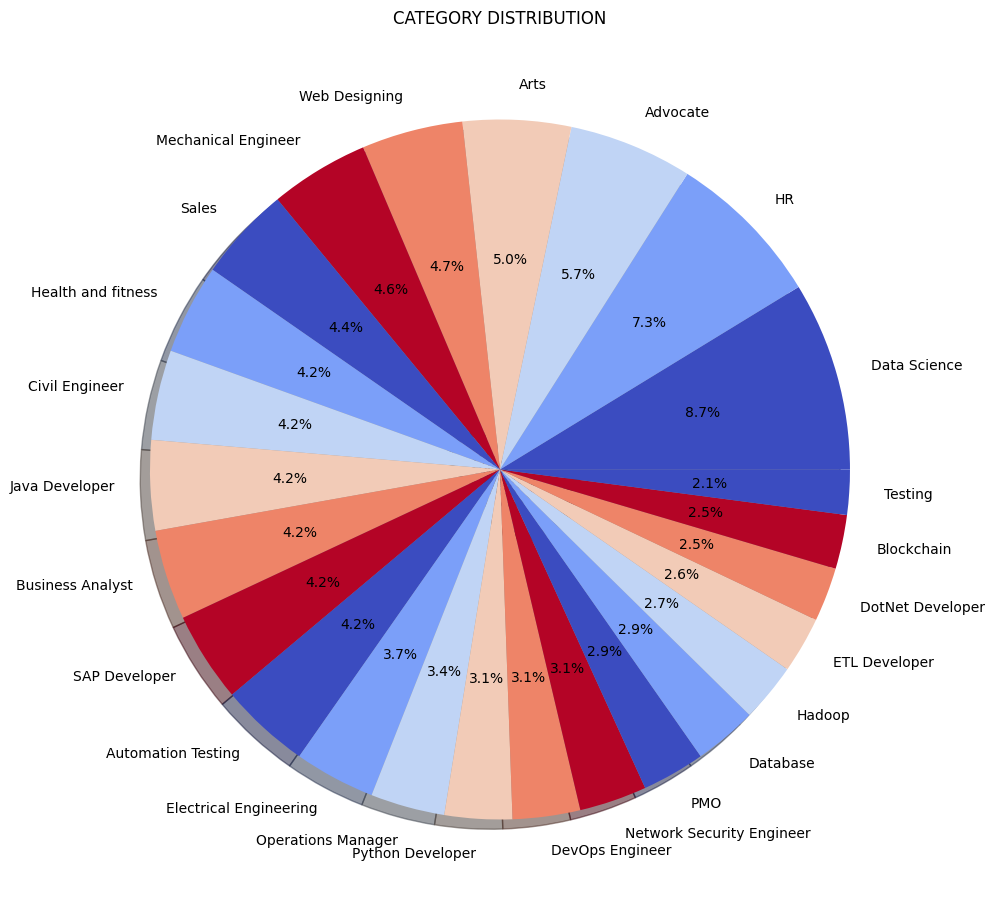

In [11]:
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].unique()
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

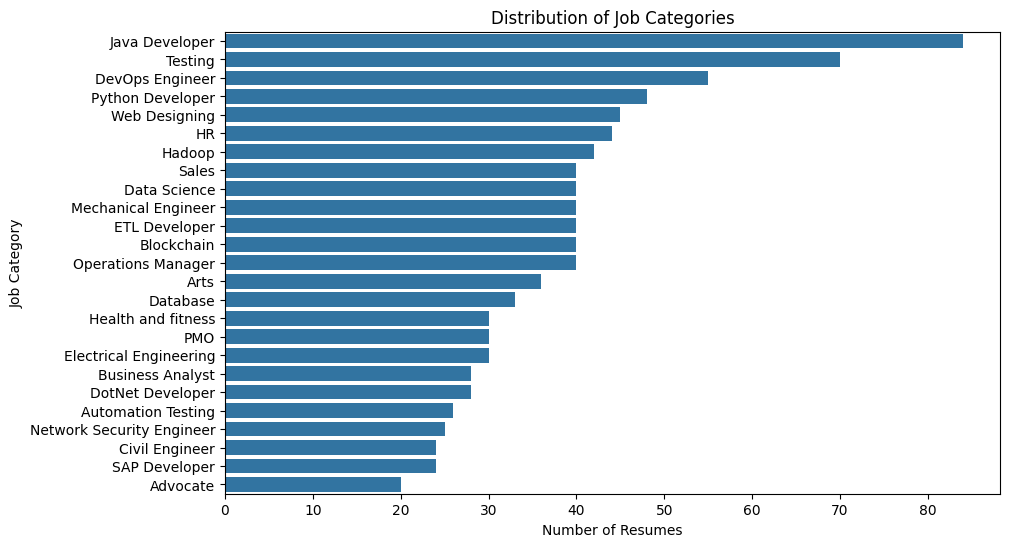

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index)
plt.title('Distribution of Job Categories')
plt.xlabel('Number of Resumes')
plt.ylabel('Job Category')
plt.show()

<h1> Preprocessing

- **Text Preprocessing**:
  - Converts text to lowercase.
  - Removes non-alphabetic characters.
  - Lemmatizes words and removes stopwords using spaCy.

- **Data Preparation**:
  - Applies preprocessing to the `Resume` column to create `cleaned_resume`.

- **Feature Extraction**:
  - Uses `TfidfVectorizer` to convert cleaned resumes into numerical feature vectors.

- **Train-Test Split**:
  - Splits data into training and testing sets (80/20 split) with stratified sampling on `Category`.

In [27]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(tokens)

data['cleaned_resume'] = data['Resume'].apply(preprocess)

vectorizer = TfidfVectorizer()
X = data['cleaned_resume']
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


<h1> Model Training


- **Model Dictionary**:
  - A collection of 5 classification models:
    - `RandomForestClassifier`
    - `SVM (linear kernel)`
    - `LogisticRegression`
    - `MultinomialNB`
    - `GradientBoostingClassifier`

- **Model Training & Evaluation**:
  - Each model is trained on the `X_train`, `y_train` data.
  - Predictions are made on `X_test`.
  - Accuracy is calculated and stored in the `accuracies` dictionary.
  - A classification report is printed for each model to show precision, recall, and F1-score.

In [15]:
models = {
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(kernel='linear', probability=True),
    "LogisticRegression": LogisticRegression(max_iter=500),
    "NaiveBayes": MultinomialNB(),
    "GradientBoosting": GradientBoostingClassifier()
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

RandomForest Accuracy: 0.9948
RandomForest Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00     

In [16]:
def predict_resume_category(resume_text, model_name="RandomForest"):
    processed_text = preprocess(resume_text)
    vector = vectorizer.transform([processed_text])
    category = models[model_name].predict(vector)[0]
    return category

Predicted Category: Data Science


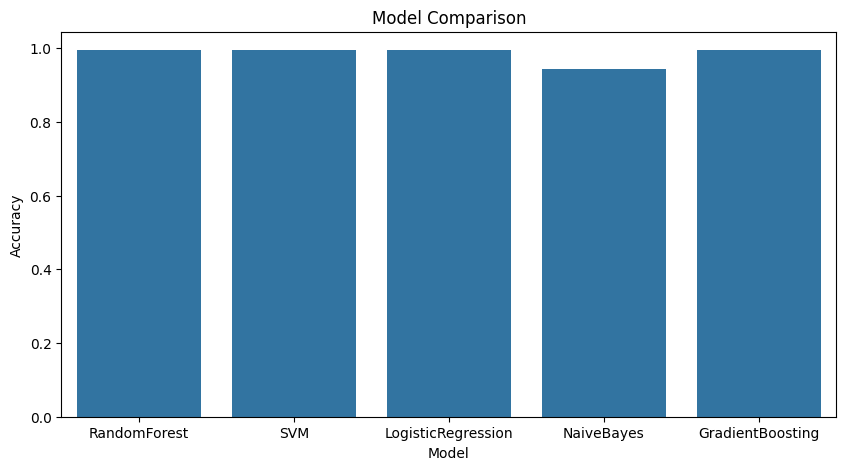

In [17]:
sample_resume = "Experienced data scientist with a strong background in machine learning and AI."
predicted_category = predict_resume_category(sample_resume)
print(f"Predicted Category: {predicted_category}")

plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


<h1> Saving the model - Pickel File Format

In [18]:
import pickle


In [33]:
model_res =Pipeline([('vectorizer', TfidfVectorizer()), ('model', RandomForestClassifier())])

In [34]:
model_res.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', RandomForestClassifier())])

In [37]:
with open('model_res.pkl', 'wb') as model_file:
    pickle.dump(models['RandomForest'], model_file)

In [36]:
from google.colab import files
files.download('model_res.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pytesseract
from pdf2image import convert_from_path
import os
import re
import pandas as pd



In [ ]:
import pytesseract
from pdf2image import convert_from_path
import os
import re
import pandas as pd

!apt-get install -y tesseract-ocr poppler-utils
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"


def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF using OCR."""
    images = convert_from_path(pdf_path)
    text = ""
    for img in images:
        text += pytesseract.image_to_string(img)
    return text

def clean_text(text):
    """Preprocesses extracted text by removing special characters and extra spaces."""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def process_resumes(pdf_folder):
    """Processes all PDFs in a folder and extracts text into a structured format."""
    resume_data = []

    for filename in os.listdir(pdf_folder):
        if filename.endswith(".pdf"):
            pdf_path = os.path.join(pdf_folder, filename)
            raw_text = extract_text_from_pdf(pdf_path)
            cleaned_text = clean_text(raw_text)
            resume_data.append({"Filename": filename, "Extracted_Text": cleaned_text})

    return pd.DataFrame(resume_data)

pdf_folder = "/content/resumes"
resume_df = process_resumes(pdf_folder)
resume_df.to_csv("extracted_resumes.csv", index=False)
print("Resume text extracted and saved to extracted_resumes.csv")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Resume text extracted and saved to extracted_resumes.csv


In [ ]:
import random

categories = ["Data Science", "Software Engineering", "Marketing", "Finance", "Human Resources"]
resume_df["Category"] = [random.choice(categories) for _ in range(len(resume_df))]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(resume_df["Extracted_Text"])
y = resume_df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predict Category for New Resumes
resume_df["Predicted_Category"] = model.predict(vectorizer.transform(resume_df["Extracted_Text"]))
resume_df.to_csv("classified_resumes.csv", index=False)
print("Classified resumes saved to classified_resumes.csv")


Model Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

Data Science       0.00      0.00      0.00       0.0
     Finance       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Classified resumes saved to classified_resumes.csv


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:

pip install pytesseract

In [ ]:
pip install pdf2image

In [ ]:
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 0s (454 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126210 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,092 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 126240 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-